In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd


In [44]:
loan_dataset=pd.read_csv('loan-train.csv')
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [46]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [47]:
loan_dataset.shape

(614, 13)

In [48]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\adelz\AppData\Local\Temp\ipykernel_18816\1230495653.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_dataset, x='Loan_Status', palette='pastel')
C:\Users\adelz\AppData\Local\Temp\ipykernel_18816\1230495653.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_dataset, x='Education', y='ApplicantIncome', palette='Set2')


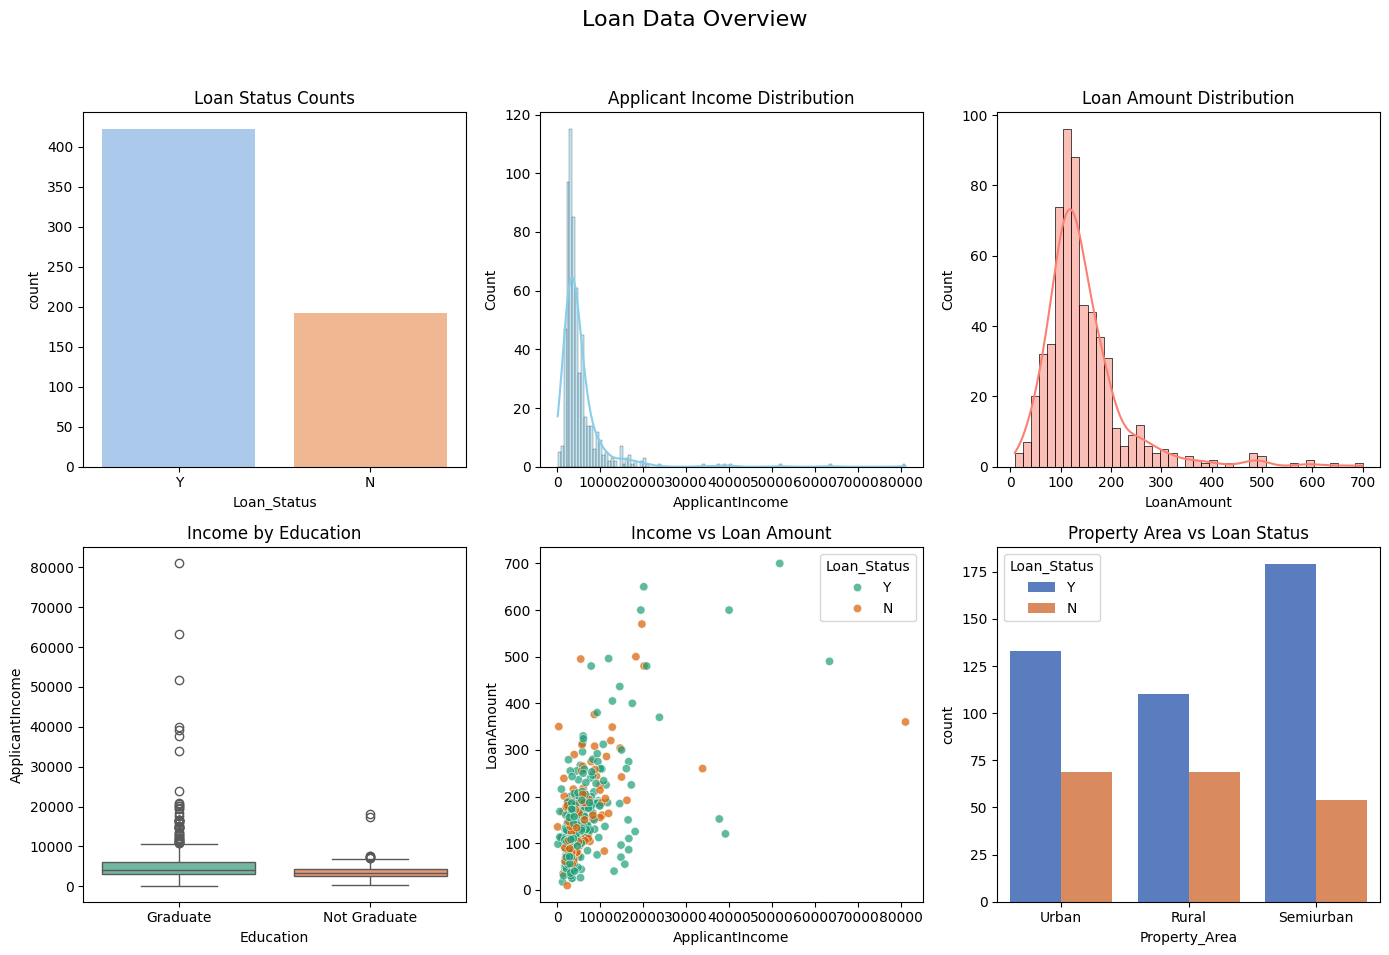

In [49]:
# lets make a graph visualization using matplotlib + seaborn for loan_dataset (no re-imports)
plt.figure(figsize=(14,10))
plt.suptitle('Loan Data Overview', fontsize=16)

# 1) Loan status counts
plt.subplot(2,3,1)
sns.countplot(data=loan_dataset, x='Loan_Status', palette='pastel')
plt.title('Loan Status Counts')

# 2) ApplicantIncome distribution
plt.subplot(2,3,2)
sns.histplot(loan_dataset['ApplicantIncome'], kde=True, color='skyblue')
plt.title('Applicant Income Distribution')

# 3) LoanAmount distribution (dropna)
plt.subplot(2,3,3)
sns.histplot(loan_dataset['LoanAmount'].dropna(), kde=True, color='salmon')
plt.title('Loan Amount Distribution')

# 4) Boxplot of ApplicantIncome by Education
plt.subplot(2,3,4)
sns.boxplot(data=loan_dataset, x='Education', y='ApplicantIncome', palette='Set2')
plt.title('Income by Education')

# 5) Scatter: ApplicantIncome vs LoanAmount colored by Loan_Status
plt.subplot(2,3,5)
sns.scatterplot(data=loan_dataset, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', alpha=0.7, palette='Dark2')
plt.title('Income vs Loan Amount')

# 6) Property Area vs Loan Status (count)
plt.subplot(2,3,6)
sns.countplot(data=loan_dataset, x='Property_Area', hue='Loan_Status', palette='muted')
plt.title('Property Area vs Loan Status')
# married vs Loan Status


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




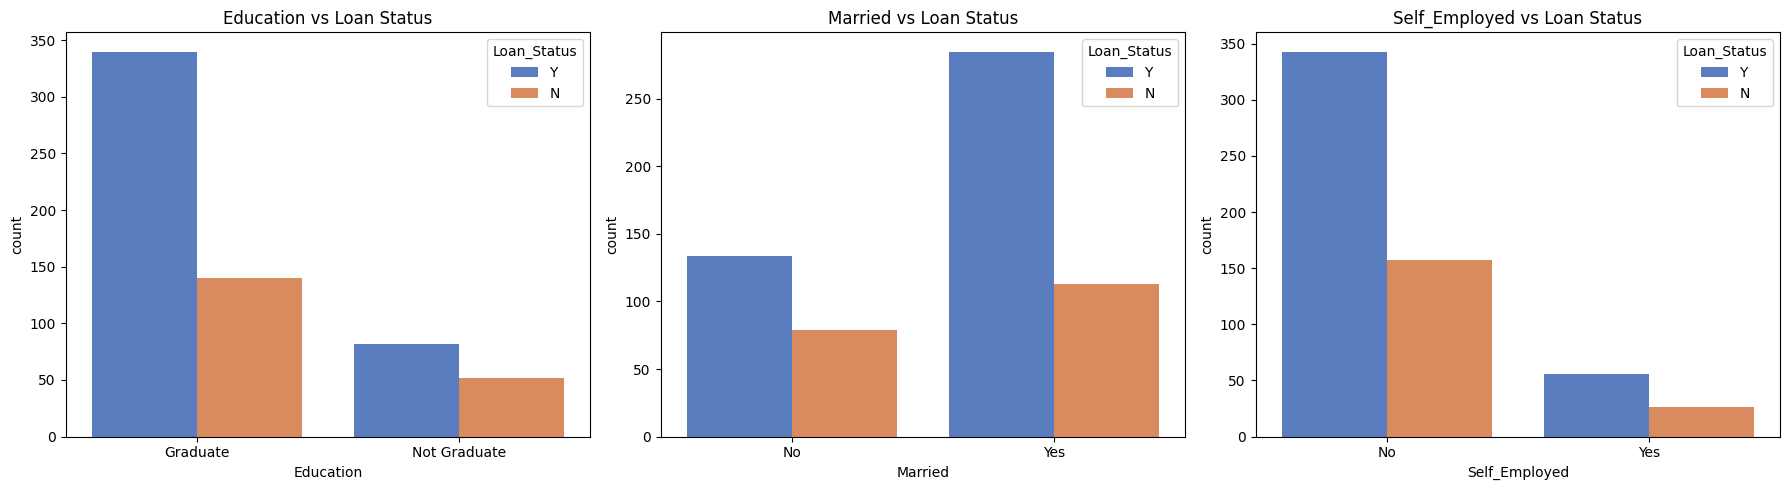

In [50]:
#for education,married,self employed, vs loan status using sns
cols = ['Education', 'Married', 'Self_Employed']
plt.figure(figsize=(18,5))
for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, hue='Loan_Status', data=loan_dataset, palette='muted')
    plt.title(f'{col} vs Loan Status')
plt.tight_layout()
plt.show()

In [51]:
# encode categorical variables if any value is missing dont encode that row
#for Dependents the '3+' value will be encoded as 4
loan_dataset['Dependents'] = loan_dataset['Dependents'].map({'0':0, '1':1, '2':2, '3+':4})
#encode other columns using label encoding
#dont encode  null values in categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
# for Deoendents column, replace '3+' with '4' for encoding
for col in categorical_columns:
    # Check if column has any missing values
    if loan_dataset[col].isnull().sum() == 0:
        loan_dataset[col] = le.fit_transform(loan_dataset[col].astype(str))
    else:
        # If column has missing values, only encode non-null values
        mask = loan_dataset[col].notna()
        loan_dataset.loc[mask, col] = le.fit_transform(loan_dataset.loc[mask, col].astype(str))
        # Missing values remain as NaN

loan_dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    int32  
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(5), int32(3), int64(1), object(4)
memory usage: 55.3+ KB


In [52]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [53]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [54]:
#fill the missing values with mean for numerical columns
numerical_columns = ['Gender','Dependents','Self_Employed','LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numerical_columns:
    loan_dataset[col].fillna(loan_dataset[col].mean(), inplace=True)
                

C:\Users\adelz\AppData\Local\Temp\ipykernel_18816\54432059.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_dataset[col].fillna(loan_dataset[col].mean(), inplace=True)
C:\Users\adelz\AppData\Local\Temp\ipykernel_18816\54432059.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset[col].fillna(

In [55]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [56]:
#fill null valuse of married with 0
loan_dataset['Married'].fillna(0, inplace=True)
loan_dataset.isnull().sum()

C:\Users\adelz\AppData\Local\Temp\ipykernel_18816\616477218.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_dataset['Married'].fillna(0, inplace=True)
C:\Users\adelz\AppData\Local\Temp\ipykernel_18816\616477218.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset['Married'].fillna(0, inplac

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

C:\Users\adelz\AppData\Local\Temp\ipykernel_18816\2199143941.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_dataset, x='Loan_Status', palette='pastel')
C:\Users\adelz\AppData\Local\Temp\ipykernel_18816\2199143941.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_dataset, x='Education', y='ApplicantIncome', palette='Set2')


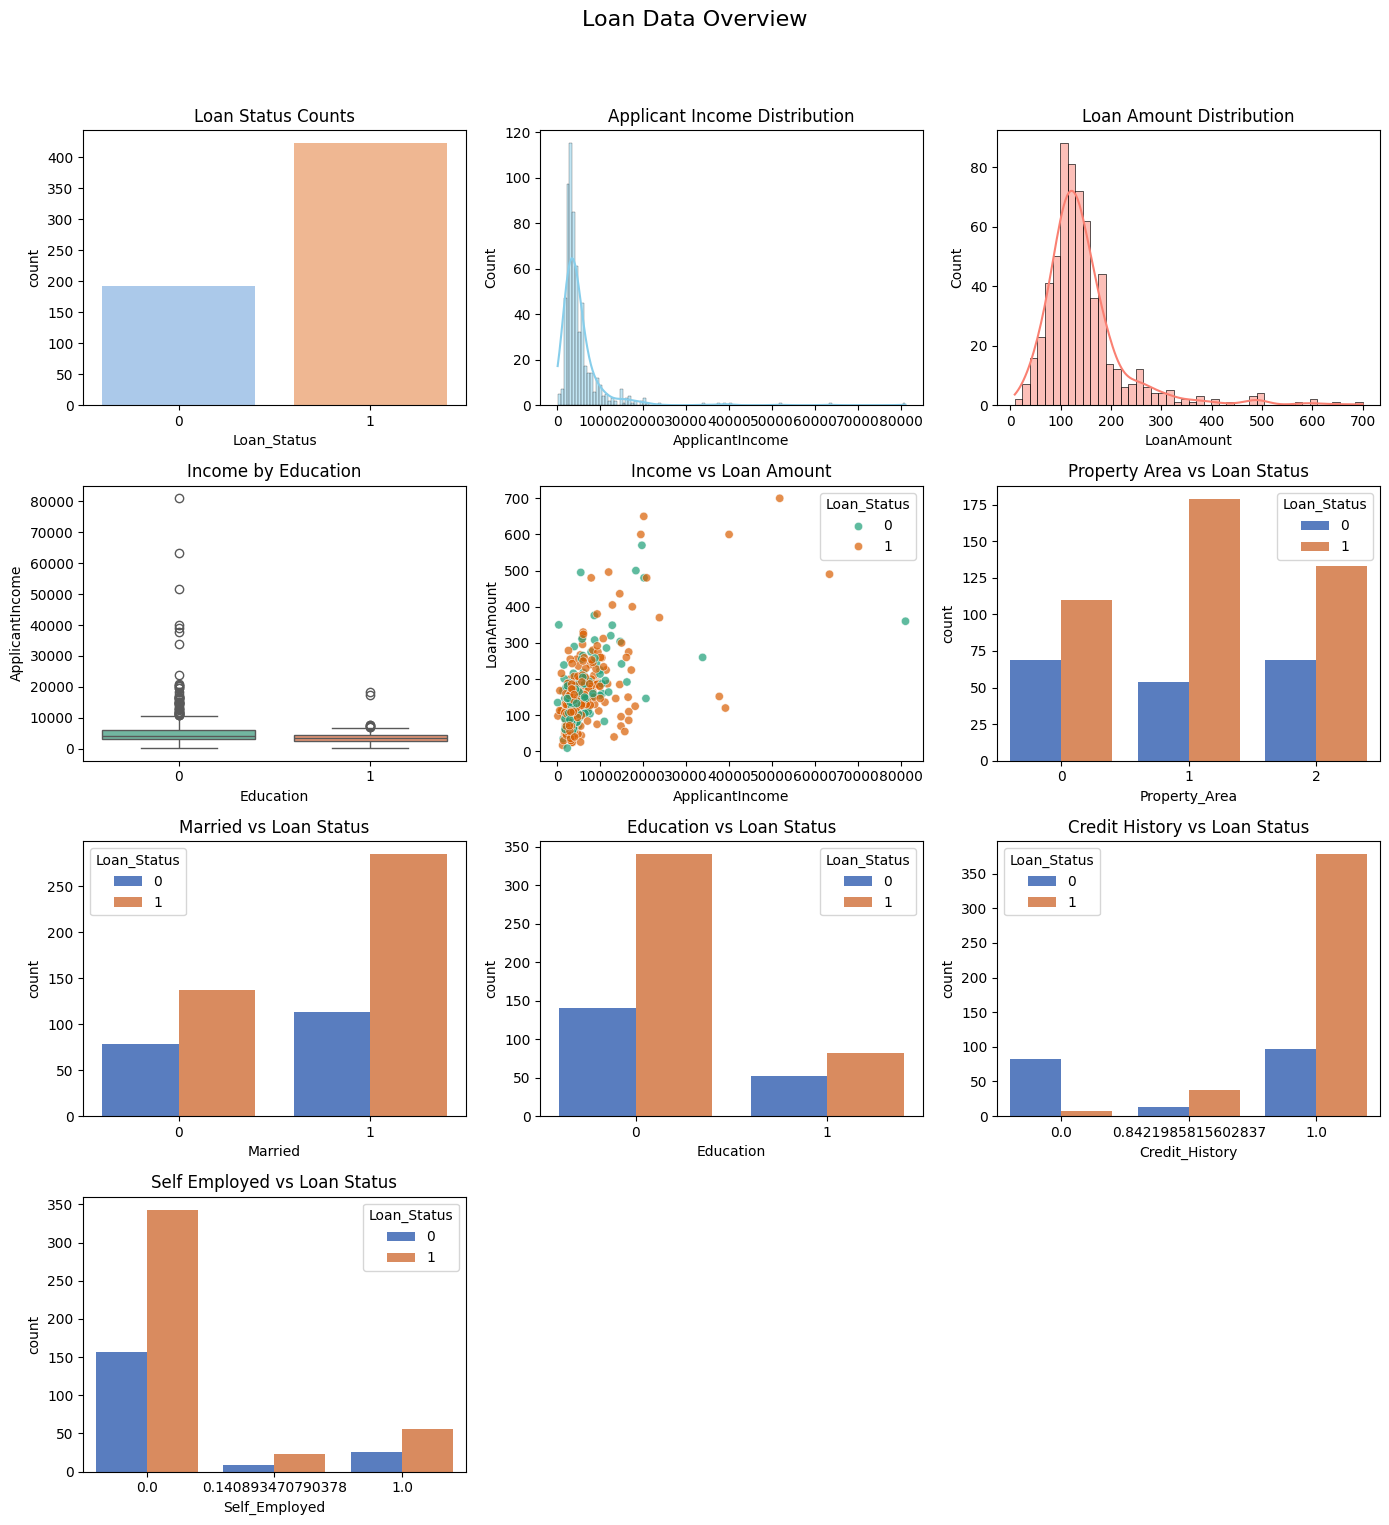

In [57]:
# lets make a graph visualization using matplotlib + seaborn for loan_dataset (no re-imports)
# expand grid to accommodate all plots (10 plots total)
plt.figure(figsize=(14,16))
plt.suptitle('Loan Data Overview', fontsize=16)

# 1) Loan status counts
plt.subplot(4,3,1)
sns.countplot(data=loan_dataset, x='Loan_Status', palette='pastel')
plt.title('Loan Status Counts')

# 2) ApplicantIncome distribution
plt.subplot(4,3,2)
sns.histplot(loan_dataset['ApplicantIncome'], kde=True, color='skyblue')
plt.title('Applicant Income Distribution')

# 3) LoanAmount distribution (dropna)
plt.subplot(4,3,3)
sns.histplot(loan_dataset['LoanAmount'].dropna(), kde=True, color='salmon')
plt.title('Loan Amount Distribution')

# 4) Boxplot of ApplicantIncome by Education
plt.subplot(4,3,4)
sns.boxplot(data=loan_dataset, x='Education', y='ApplicantIncome', palette='Set2')
plt.title('Income by Education')

# 5) Scatter: ApplicantIncome vs LoanAmount colored by Loan_Status
plt.subplot(4,3,5)
sns.scatterplot(data=loan_dataset, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', alpha=0.7, palette='Dark2')
plt.title('Income vs Loan Amount')

# 6) Property Area vs Loan Status (count)
plt.subplot(4,3,6)
sns.countplot(data=loan_dataset, x='Property_Area', hue='Loan_Status', palette='muted')
plt.title('Property Area vs Loan Status')

# 7) Married vs Loan Status
plt.subplot(4,3,7)
sns.countplot(data=loan_dataset, x='Married', hue='Loan_Status', palette='muted')
plt.title('Married vs Loan Status')

# 8) Education vs Loan Status
plt.subplot(4,3,8)
sns.countplot(data=loan_dataset, x='Education', hue='Loan_Status', palette='muted')
plt.title('Education vs Loan Status')

# 9) Credit History vs Loan Status
plt.subplot(4,3,9)
sns.countplot(data=loan_dataset, x='Credit_History', hue='Loan_Status', palette='muted')
plt.title('Credit History vs Loan Status')

# 10) Self Employed vs Loan Status
plt.subplot(4,3,10)
sns.countplot(data=loan_dataset, x='Self_Employed', hue='Loan_Status', palette='muted')
plt.title('Self Employed vs Loan Status')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




In [58]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0,0.0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1,1.0,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1,0.0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1,0.0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0,0.0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1


In [59]:
#standardize the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
loan_dataset[numerical_cols] = scaler.fit_transform(loan_dataset[numerical_cols])
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0,0.0,0,0.0,0.072991,-0.554487,0.000000,0.279851,1.0,2,1
1,LP001003,1.0,1,1.0,0,0.0,-0.134412,-0.038732,-0.219273,0.279851,1.0,0,0
2,LP001005,1.0,1,0.0,0,1.0,-0.393747,-0.554487,-0.957641,0.279851,1.0,2,1
3,LP001006,1.0,1,0.0,1,0.0,-0.462062,0.251980,-0.314547,0.279851,1.0,2,1
4,LP001008,1.0,0,0.0,0,0.0,0.097728,-0.554487,-0.064454,0.279851,1.0,2,1


In [60]:
#separitn the data level
X=loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=loan_dataset['Loan_Status']

In [61]:
# Train Test split
from sklearn.model_selection import train_test_split
from sklearn import svm

# Correct parameter name is 'test_size' not 'size'
x_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, Y_train)  # Should be Y_train, not Y_test

SVC(kernel='linear')

In [62]:
from sklearn.metrics import accuracy_score
X_test_pred=classifier.predict(x_test)
TR_acc=accuracy_score(X_test_pred,Y_test)
print(TR_acc)

0.8048780487804879


In [ ]:
#test prediction function
def predict_loan_status(input_data):
    # Convert input data to numpy array
    input_array = np.array(input_data).reshape(1, -1)
    
    # Make prediction
    prediction = classifier.predict(input_array)
    
    return prediction[0]
#predict_loan_status([1,0,0,0,6000,0,150,360,1,0,1,0])
import pickle
# Save the trained model as a pickle file
with open('loan_status_model.pkl', 'wb') as file:
    pickle.dump(classifier, file)
# Load the model from the pickle file
with open('loan_status_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
# Test the loaded model
result = loaded_model.predict(np.array([1,0,0,0,6000,0,150,360,1,0,1,0]).reshape(1, -1))
print(result)
if result[0] == 1:
    print("The applicant is eligible for loan")
else:
    print("The applicant is not eligible for loan")